# <span style='color:purple'>Lab 2</span>

## Group Members
- Helene Barrera
- Feby Thomas
- John Olanipekun
- Justin Ehly

## <span style='color:purple'><u> Lab 2 Executive Summary </u></span>
* This exercise seeks to fit:
    - **Task 1: Regression** Estimate Actual Delivery Time Length (using actual delivery time as the test metric)
    - **Task 2: Classification** Classify for review score
    - **Alt Task 2: Classification** how a customer is likely to pay for their order


In [1]:
# set up environment
import numpy as np
import pandas as pd
import os
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation (15 points total)
* [10 points] Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis.
*[5 points] Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).

In [2]:
# change working directory
os.chdir(r"C:\Users\olani\OneDrive\Documents\Data Science\SMU-Data Science\Machine Learning 1\Lab 2_Classification")
#"C:\Users\olani\OneDrive\Documents\Data Science\SMU-Data Science\Machine Learning 1\Olist_Dataset"

# get current working directory
os.getcwd()

'C:\\Users\\olani\\OneDrive\\Documents\\Data Science\\SMU-Data Science\\Machine Learning 1\\Lab 2_Classification'

In [3]:
olist = pd.read_csv('olist_lab1_data.csv')
olist.head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,...,seller_state,tot_order_amt,purchase_wk_day,purchase_month,review_score_class,order_delivery_actual_duration,order_delivery_estimated_duration,delivery_estimate_discrepancy,product_dimensions,delivery_est_discrepancy_range
0,b81ef226f3fe1789b1e8b2acac839d17,0a8556ac6be836b46b3e89920d59291c,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,...,SP,99.33,Wednesday,April,bad,13,26,13,7803.0,too early
1,a9810da82917af2d9aefd1278f1dcfa0,f2c7fc58a9de810828715166c672f10a,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,...,SP,24.39,Tuesday,June,good,3,19,16,1056.0,too early
2,25e8ea4e93396b6fa0d3dd708e76c1bd,25b14b69de0b6e184ae6fe2755e478f9,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,...,SP,65.71,Tuesday,December,good,4,20,16,3360.0,too early
3,ba78997921bbcdc1373bb41e913ab953,7a5d8efaaa1081f800628c30d2b0728f,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,...,SP,107.78,Wednesday,December,good,14,28,14,3080.0,too early
4,ba78997921bbcdc1373bb41e913ab953,7a5d8efaaa1081f800628c30d2b0728f,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,...,SP,107.78,Wednesday,December,good,14,28,14,3080.0,too early


In [4]:
olist.customer_city.value_counts()

sao paulo              18001
rio de janeiro          7872
belo horizonte          3159
brasilia                2400
curitiba                1775
                       ...  
guassusse                  1
fortaleza dos valos        1
lago verde                 1
morro redondo              1
caetes                     1
Name: customer_city, Length: 4073, dtype: int64

In [5]:
olist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114067 entries, 0 to 114066
Data columns (total 47 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   order_id                           114067 non-null  object 
 1   customer_id                        114067 non-null  object 
 2   order_purchase_timestamp           114067 non-null  object 
 3   order_approved_at                  114067 non-null  object 
 4   order_delivered_carrier_date       114067 non-null  object 
 5   order_delivered_customer_date      114067 non-null  object 
 6   order_estimated_delivery_date      114067 non-null  object 
 7   customer_unique_id                 114067 non-null  object 
 8   customer_zip_code_prefix           114067 non-null  int64  
 9   customer_city                      114067 non-null  object 
 10  customer_state                     114067 non-null  object 
 11  review_id                          1140

In [6]:
import copy
olist_model = copy.deepcopy(olist)
olist_model.head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,...,seller_state,tot_order_amt,purchase_wk_day,purchase_month,review_score_class,order_delivery_actual_duration,order_delivery_estimated_duration,delivery_estimate_discrepancy,product_dimensions,delivery_est_discrepancy_range
0,b81ef226f3fe1789b1e8b2acac839d17,0a8556ac6be836b46b3e89920d59291c,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,...,SP,99.33,Wednesday,April,bad,13,26,13,7803.0,too early
1,a9810da82917af2d9aefd1278f1dcfa0,f2c7fc58a9de810828715166c672f10a,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,...,SP,24.39,Tuesday,June,good,3,19,16,1056.0,too early
2,25e8ea4e93396b6fa0d3dd708e76c1bd,25b14b69de0b6e184ae6fe2755e478f9,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,...,SP,65.71,Tuesday,December,good,4,20,16,3360.0,too early
3,ba78997921bbcdc1373bb41e913ab953,7a5d8efaaa1081f800628c30d2b0728f,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,...,SP,107.78,Wednesday,December,good,14,28,14,3080.0,too early
4,ba78997921bbcdc1373bb41e913ab953,7a5d8efaaa1081f800628c30d2b0728f,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,...,SP,107.78,Wednesday,December,good,14,28,14,3080.0,too early


In [7]:
olist_model.customer_city.value_counts()

sao paulo              18001
rio de janeiro          7872
belo horizonte          3159
brasilia                2400
curitiba                1775
                       ...  
guassusse                  1
fortaleza dos valos        1
lago verde                 1
morro redondo              1
caetes                     1
Name: customer_city, Length: 4073, dtype: int64

{'bodies': [<matplotlib.collections.PolyCollection at 0x1c52ee56988>],
 'cmeans': <matplotlib.collections.LineCollection at 0x1c5365cd988>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x1c52c39ed88>,
 'cmins': <matplotlib.collections.LineCollection at 0x1c52f3a4608>,
 'cbars': <matplotlib.collections.LineCollection at 0x1c52f3a4b48>}

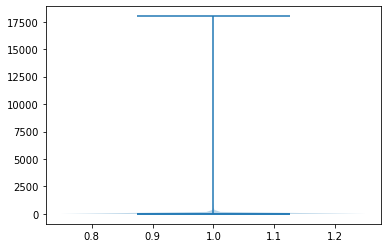

In [8]:
cu_city = olist_model.customer_city.value_counts().to_frame()
cu_city=cu_city.reset_index()
plt.violinplot(cu_city.customer_city, showmeans=True)

In [9]:
cu_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4073 entries, 0 to 4072
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          4073 non-null   object
 1   customer_city  4073 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 63.8+ KB


### Location plots

In [10]:
olist_loc = pd.read_csv('olist_geolocation_dataset.csv')
olist_loc.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [11]:
olist_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [12]:
cat_features = ['geolocation_city', 'geolocation_state'] 
olist_loc[cat_features] = olist_loc.copy()[cat_features].astype("category")

In [13]:
loc_counts = olist_loc.geolocation_city.value_counts().to_frame()
loc_counts.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 8011 entries, sao paulo to * cidade
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   geolocation_city  8011 non-null   int64
dtypes: int64(1)
memory usage: 398.9 KB


In [16]:
loc_countsidx=loc_counts.reset_index()
loc_countsidx

,index,geolocation_city
0,sao paulo,135800
1,rio de janeiro,62151
2,belo horizonte,27805
3,são paulo,24918
4,curitiba,16593
...,...,...
8006,serra dos dourados,1
8007,guaxima,1
8008,guia de pacobaíba,1
8009,serra da tapuia,1


In [18]:
import re
#pattern = "ã"
#loc_countsidx['index1'] = loc_countsidx['index'].replace(r'/+são paulo/',"sao paulo")
#loc_countsidx['index2'] =[re.sub('ã',"a", i) for i in loc_countsidx['index1']]

In [19]:
#loc_countsidx['index2'] =[re.sub('ã',"a", i) for i in loc_countsidx['index1']]

KeyError: 'index1'

In [ ]:
loc_countsidx['index2']= loc_countsidx['index2'].astype("category")
loc_countsidx['index3']= loc_countsidx['index3'].astype("category")
loc_countsidx.info()

In [ ]:
most = []
outlying = []

thresh = np.quantile(loc_countsidx['geolocation_city'], 0.95)
[most.append(i)
 if abs(i) <= thresh else outlying.append(i)
 for i in loc_countsidx['geolocation_city']]
#y = np.array(y)


In [ ]:
plt.violinplot(outlying, showmeans=True)
plt.ylabel('days_diff.Actual_Estimate')
plt.title('Distribution of Discrepancy') #labels

In [ ]:
loc_countsidx['geolocation_city'].describe()

In [ ]:
loc_countsidx_sub =loc_countsidx[loc_countsidx['geolocation_city']>1000]
loc_countsidx_sub.info()                     

In [ ]:
plt.violinplot(loc_countsidx_sub.geolocation_city, showmeans=True)

In [ ]:
import nltk
import numpy as np
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [ ]:
default_wt = nltk.word_tokenize
loc_countsidx['index3'] = [default_wt(word) for word in loc_countsidx['index2']]

In [ ]:
loc_countsidx['index3'] = [' '.join(i) for i in loc_countsidx['index3']]

In [ ]:
for i in loc_countsidx['index3']:
    print(i)

In [20]:
import matplotlib as mpl

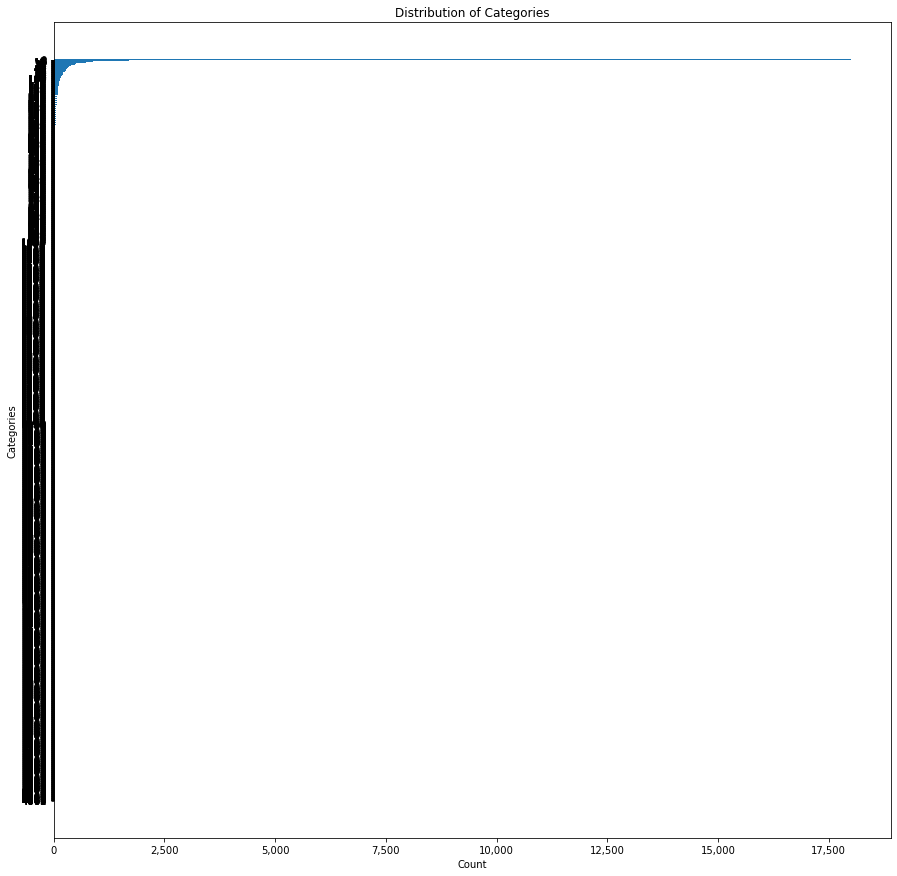

In [21]:
# Chart distribution of categories
fig, ax = plt.subplots(figsize=(15,15))
y = cu_city.index
y_pos = np.flip(np.arange(len(y)))
width = cu_city.customer_city
ax.barh(y_pos, width=width, align='center')
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_facecolor('white')
ax.set_yticks(y_pos)
ax.set_yticklabels(y)
plt.title('Distribution of Categories')
plt.ylabel('Categories')
plt.xlabel('Count')
plt.show()

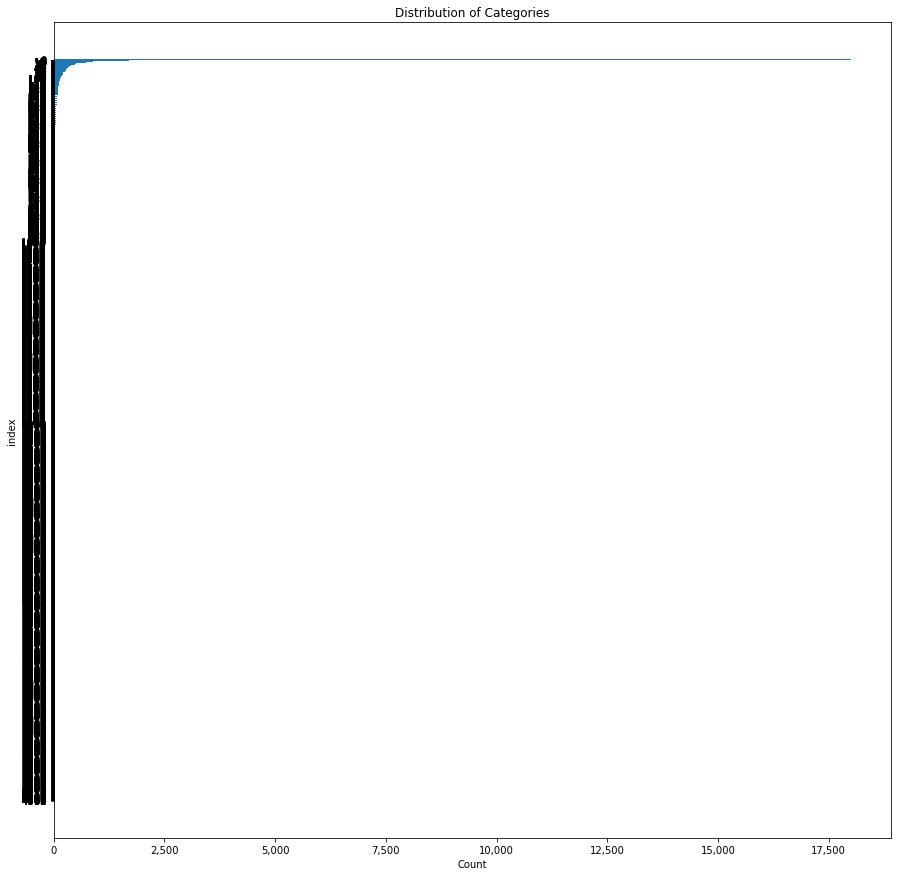

In [22]:
# Chart distribution of categories
fig, ax = plt.subplots(figsize=(15,15))
y = cu_city.index
y_pos = np.flip(np.arange(len(y)))
width = cu_city.customer_city
ax.barh(y_pos, width=width, align='center')
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_facecolor('white')
ax.set_yticks(y_pos)
ax.set_yticklabels(y)
plt.title('Distribution of Categories')
plt.ylabel('index')
plt.xlabel('Count')
plt.show()

{'bodies': [<matplotlib.collections.PolyCollection at 0x1c54413f348>],
 'cmeans': <matplotlib.collections.LineCollection at 0x1c54715e108>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x1c54715ea88>,
 'cmins': <matplotlib.collections.LineCollection at 0x1c5469577c8>,
 'cbars': <matplotlib.collections.LineCollection at 0x1c546c246c8>}

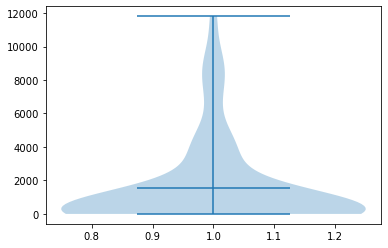

In [23]:
prod_cat = olist_model.product_category_english.value_counts().to_frame()
prod_cat=prod_cat.reset_index()
plt.violinplot(prod_cat.product_category_english, showmeans=True)

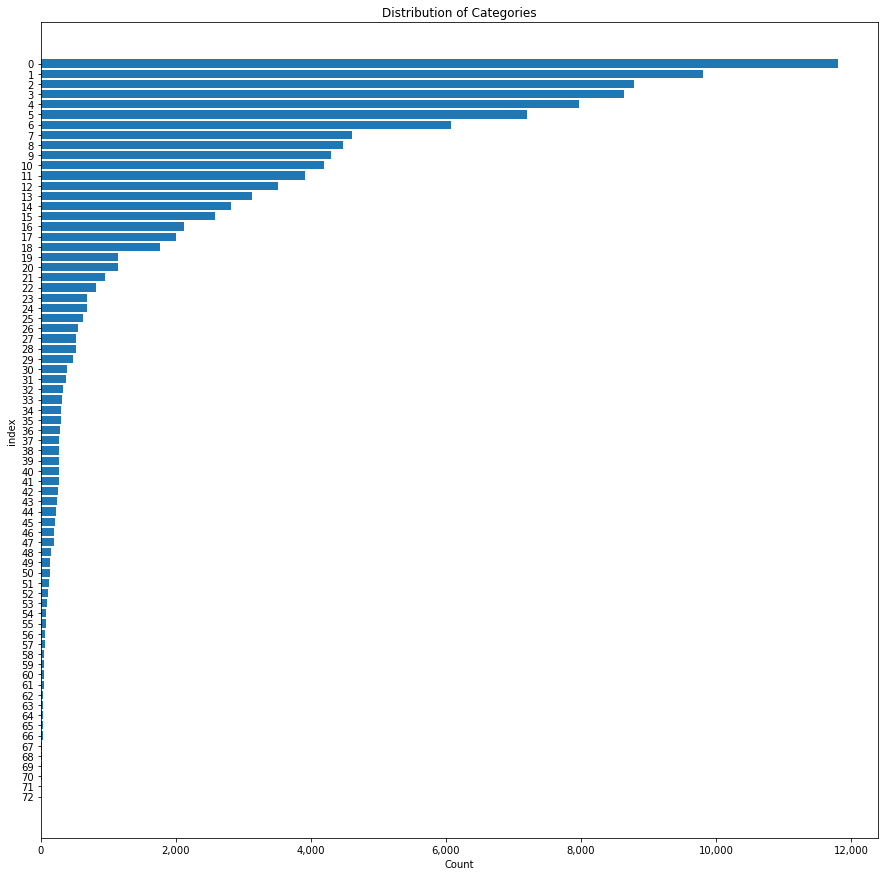

In [24]:
# Chart distribution of categories
fig, ax = plt.subplots(figsize=(15,15))
y = prod_cat.index
y_pos = np.flip(np.arange(len(y)))
width = prod_cat.product_category_english
ax.barh(y_pos, width=width, align='center')
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_facecolor('white')
ax.set_yticks(y_pos)
ax.set_yticklabels(y)
plt.title('Distribution of Categories')
plt.ylabel('index')
plt.xlabel('Count')
plt.show()

In [25]:
#Check point
olist_model2 = olist_model.copy()

In [26]:
#replace instances less than 1000 with 'other product category'
_ = olist_model2.product_category_english.map(olist_model2.product_category_english.value_counts()) < 1000
olist_model2.product_category_english =  olist_model2.product_category_english.mask(_, 'other_product')

In [27]:
prod_cat = olist_model2.product_category_english.value_counts().to_frame()
prod_cat=prod_cat.reset_index()

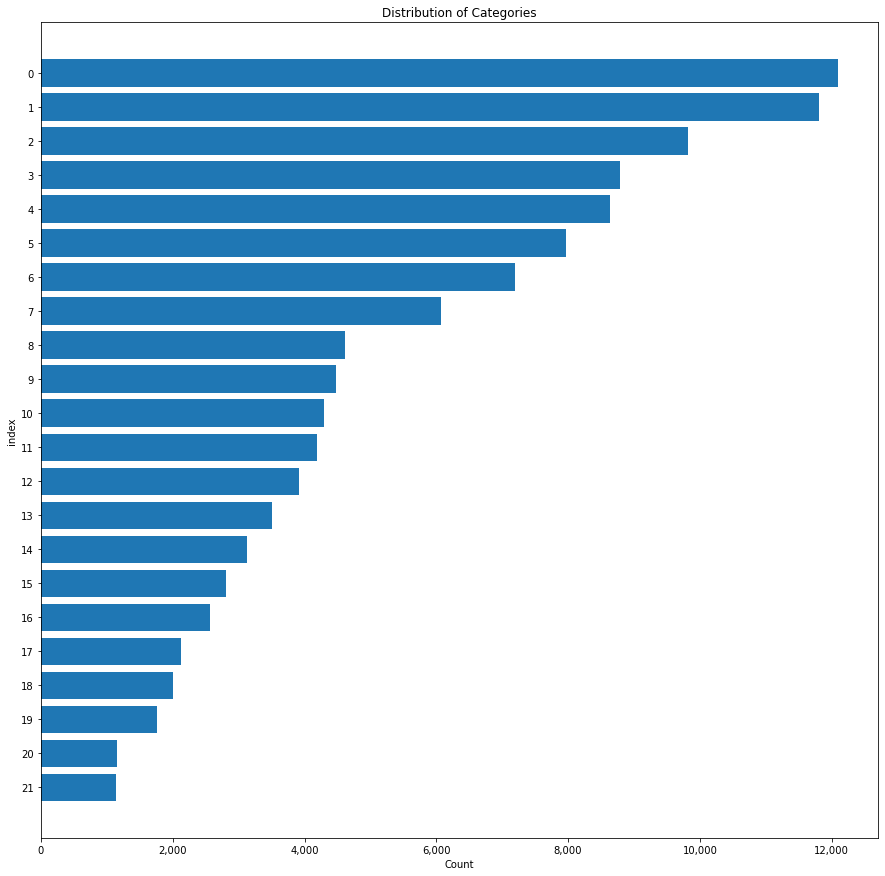

In [28]:
#Check the result
# Chart distribution of categories
fig, ax = plt.subplots(figsize=(15,15))
y = prod_cat.index
y_pos = np.flip(np.arange(len(y)))
width = prod_cat.product_category_english
ax.barh(y_pos, width=width, align='center')
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_facecolor('white')
ax.set_yticks(y_pos)
ax.set_yticklabels(y)
plt.title('Distribution of Categories')
plt.ylabel('index')
plt.xlabel('Count')
plt.show()

In [29]:
_ = olist_model2.customer_city.map(olist_model2.customer_city.value_counts()) < 300
olist_model2.customer_city =  olist_model2.customer_city.mask(_, 'other_city')

In [30]:
cu_city = olist_model2.customer_city.value_counts()
cu_city=cu_city.reset_index()

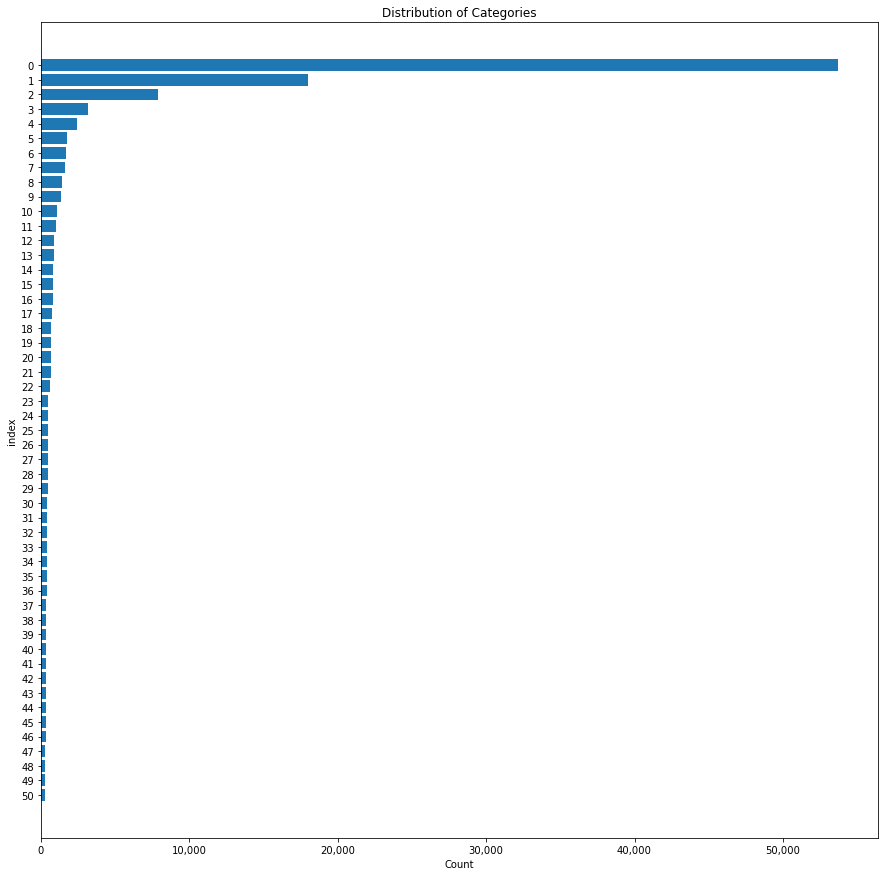

In [31]:
#Check the result
# Chart distribution of categories
fig, ax = plt.subplots(figsize=(15,15))
y = cu_city.index
y_pos = np.flip(np.arange(len(y)))
width = cu_city.customer_city
ax.barh(y_pos, width=width, align='center')
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_facecolor('white')
ax.set_yticks(y_pos)
ax.set_yticklabels(y)
plt.title('Distribution of Categories')
plt.ylabel('index')
plt.xlabel('Count')
plt.show()

In [32]:
olist_model2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114067 entries, 0 to 114066
Data columns (total 47 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   order_id                           114067 non-null  object 
 1   customer_id                        114067 non-null  object 
 2   order_purchase_timestamp           114067 non-null  object 
 3   order_approved_at                  114067 non-null  object 
 4   order_delivered_carrier_date       114067 non-null  object 
 5   order_delivered_customer_date      114067 non-null  object 
 6   order_estimated_delivery_date      114067 non-null  object 
 7   customer_unique_id                 114067 non-null  object 
 8   customer_zip_code_prefix           114067 non-null  int64  
 9   customer_city                      114067 non-null  object 
 10  customer_state                     114067 non-null  object 
 11  review_id                          1140

In [33]:
#Subset for the modeling dataset
olist_model3 = olist_model2[['payment_sequential', 'payment_installments', 'product_category_english', 
                            'seller_zip_code_prefix','seller_city', 'tot_order_amt', 
                            'freight_value', 'product_dimensions', 'purchase_wk_day', 'purchase_month','review_score_class', 'product_weight_g', 'customer_city',
                            'customer_zip_code_prefix','order_approved_at', 'order_delivery_actual_duration']]
olist_model3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114067 entries, 0 to 114066
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   payment_sequential              114067 non-null  float64
 1   payment_installments            114067 non-null  float64
 2   product_category_english        114067 non-null  object 
 3   seller_zip_code_prefix          114067 non-null  float64
 4   seller_city                     114067 non-null  object 
 5   tot_order_amt                   114067 non-null  float64
 6   freight_value                   114067 non-null  float64
 7   product_dimensions              114066 non-null  float64
 8   purchase_wk_day                 114067 non-null  object 
 9   purchase_month                  114067 non-null  object 
 10  review_score_class              114067 non-null  object 
 11  product_weight_g                114066 non-null  float64
 12  customer_city   

In [34]:
olist_model3.review_score_class.unique()

array(['bad', 'good', 'fair'], dtype=object)

In [35]:
olist_model3.head(n=30)

,payment_sequential,payment_installments,product_category_english,seller_zip_code_prefix,seller_city,tot_order_amt,freight_value,product_dimensions,purchase_wk_day,purchase_month,review_score_class,product_weight_g,customer_city,customer_zip_code_prefix,order_approved_at,order_delivery_actual_duration
0,1.0,8.0,other_product,13321.0,salto,99.33,19.53,7803.0,Wednesday,April,bad,800.0,other_city,39801,2018-04-25 22:15:09,13
1,1.0,1.0,auto,4660.0,sao paulo,24.39,7.39,1056.0,Tuesday,June,good,150.0,sao paulo,2422,2018-06-26 11:18:58,3
2,1.0,1.0,perfumery,9015.0,santo andre,65.71,8.72,3360.0,Tuesday,December,good,250.0,sao paulo,2652,2017-12-14 09:52:34,4
3,1.0,8.0,bed_bath_table,13405.0,piracicaba,107.78,17.88,3080.0,Wednesday,December,good,1200.0,juiz de fora,36060,2017-12-06 12:13:20,14
4,1.0,8.0,bed_bath_table,13405.0,piracicaba,107.78,17.88,3080.0,Wednesday,December,good,1200.0,juiz de fora,36060,2017-12-06 12:13:20,14
5,1.0,2.0,bed_bath_table,14940.0,ibitinga,128.45,14.88,11880.0,Monday,May,good,835.0,other_city,18570,2018-05-21 16:14:41,11
6,1.0,2.0,bed_bath_table,14940.0,ibitinga,48.06,13.71,6510.0,Monday,May,good,623.0,other_city,13614,2018-05-07 15:31:14,7
7,1.0,2.0,bed_bath_table,14940.0,ibitinga,48.06,13.71,6510.0,Monday,May,good,623.0,other_city,13614,2018-05-07 15:31:14,7
8,1.0,1.0,housewares,13206.0,jundiai,81.16,21.26,32994.0,Friday,June,good,7000.0,belo horizonte,31230,2017-06-23 13:25:19,10
9,1.0,3.0,perfumery,17350.0,igaracu do tiete,51.84,11.85,2376.0,Monday,June,good,425.0,other_city,15200,2017-06-05 10:55:16,18


In [36]:
#I realized that most ML models prefer working with numerics so some of the categorical levels as numeric codes
olist_model3['review_score_class_num'] = olist_model3.review_score_class.copy().astype("category").cat.codes

#so: 0 = Bad, 1 = fair, 2 = Good
olist_model3.head(n=25)

C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,payment_sequential,payment_installments,product_category_english,seller_zip_code_prefix,seller_city,tot_order_amt,freight_value,product_dimensions,purchase_wk_day,purchase_month,review_score_class,product_weight_g,customer_city,customer_zip_code_prefix,order_approved_at,order_delivery_actual_duration,review_score_class_num
0,1.0,8.0,other_product,13321.0,salto,99.33,19.53,7803.0,Wednesday,April,bad,800.0,other_city,39801,2018-04-25 22:15:09,13,0
1,1.0,1.0,auto,4660.0,sao paulo,24.39,7.39,1056.0,Tuesday,June,good,150.0,sao paulo,2422,2018-06-26 11:18:58,3,2
2,1.0,1.0,perfumery,9015.0,santo andre,65.71,8.72,3360.0,Tuesday,December,good,250.0,sao paulo,2652,2017-12-14 09:52:34,4,2
3,1.0,8.0,bed_bath_table,13405.0,piracicaba,107.78,17.88,3080.0,Wednesday,December,good,1200.0,juiz de fora,36060,2017-12-06 12:13:20,14,2
4,1.0,8.0,bed_bath_table,13405.0,piracicaba,107.78,17.88,3080.0,Wednesday,December,good,1200.0,juiz de fora,36060,2017-12-06 12:13:20,14,2
5,1.0,2.0,bed_bath_table,14940.0,ibitinga,128.45,14.88,11880.0,Monday,May,good,835.0,other_city,18570,2018-05-21 16:14:41,11,2
6,1.0,2.0,bed_bath_table,14940.0,ibitinga,48.06,13.71,6510.0,Monday,May,good,623.0,other_city,13614,2018-05-07 15:31:14,7,2
7,1.0,2.0,bed_bath_table,14940.0,ibitinga,48.06,13.71,6510.0,Monday,May,good,623.0,other_city,13614,2018-05-07 15:31:14,7,2
8,1.0,1.0,housewares,13206.0,jundiai,81.16,21.26,32994.0,Friday,June,good,7000.0,belo horizonte,31230,2017-06-23 13:25:19,10,2
9,1.0,3.0,perfumery,17350.0,igaracu do tiete,51.84,11.85,2376.0,Monday,June,good,425.0,other_city,15200,2017-06-05 10:55:16,18,2


In [37]:
#Correct attribute data types
olist_model3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114067 entries, 0 to 114066
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   payment_sequential              114067 non-null  float64
 1   payment_installments            114067 non-null  float64
 2   product_category_english        114067 non-null  object 
 3   seller_zip_code_prefix          114067 non-null  float64
 4   seller_city                     114067 non-null  object 
 5   tot_order_amt                   114067 non-null  float64
 6   freight_value                   114067 non-null  float64
 7   product_dimensions              114066 non-null  float64
 8   purchase_wk_day                 114067 non-null  object 
 9   purchase_month                  114067 non-null  object 
 10  review_score_class              114067 non-null  object 
 11  product_weight_g                114066 non-null  float64
 12  customer_city   

In [ ]:
#All datatypes. Just in case I need it.
#Modify datatypes
#changing attributes data types
continuous_features = ['freight_value', 'payment_sequential','payment_installments',
                       'product_weight_g','review_score',
                       'order_delivery_actual_duration', 'order_delivery_estimated_duration',
                       'delivery_estimate_discrepancy', 'product_dimensions', 'tot_order_amt'] 

cat_features = ['customer_city', 'customer_zip_code_prefix', 'seller_zip_code_prefix', 
                'seller_city', 'product_category_english', 
               'purchase_wk_day', 'purchase_month',
               'review_score_class', 'review_score_class_num'] 

date_features = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date',
                 'order_estimated_delivery_date', 'shipping_limit_date', 'review_creation_date', 'review_answer_timestamp'] 

In [38]:
cat_features = ['customer_city', 'customer_zip_code_prefix', 'seller_zip_code_prefix', 
                'seller_city', 'product_category_english', 'purchase_wk_day', 'purchase_month',
               'review_score_class', 'review_score_class_num'] 

In [39]:
olist_model3[cat_features] = olist_model3[cat_features].astype("category")


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


### Relevance of order hour of day 
#### Working with the date.

In [40]:
#Strip time of day from the date attribute.
from datetime import datetime
olist_model3['order_approved_at']=pd.to_datetime(olist_model3['order_approved_at'])
#olist_model3['order_approved_time'] = olist_model3['order_approved_at'].dt.strftime('%H:%M')
#2018-04-25 22:15:09
olist_model3.head(n=5)

C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,payment_sequential,payment_installments,product_category_english,seller_zip_code_prefix,seller_city,tot_order_amt,freight_value,product_dimensions,purchase_wk_day,purchase_month,review_score_class,product_weight_g,customer_city,customer_zip_code_prefix,order_approved_at,order_delivery_actual_duration,review_score_class_num
0,1.0,8.0,other_product,13321.0,salto,99.33,19.53,7803.0,Wednesday,April,bad,800.0,other_city,39801,2018-04-25 22:15:09,13,0
1,1.0,1.0,auto,4660.0,sao paulo,24.39,7.39,1056.0,Tuesday,June,good,150.0,sao paulo,2422,2018-06-26 11:18:58,3,2
2,1.0,1.0,perfumery,9015.0,santo andre,65.71,8.72,3360.0,Tuesday,December,good,250.0,sao paulo,2652,2017-12-14 09:52:34,4,2
3,1.0,8.0,bed_bath_table,13405.0,piracicaba,107.78,17.88,3080.0,Wednesday,December,good,1200.0,juiz de fora,36060,2017-12-06 12:13:20,14,2
4,1.0,8.0,bed_bath_table,13405.0,piracicaba,107.78,17.88,3080.0,Wednesday,December,good,1200.0,juiz de fora,36060,2017-12-06 12:13:20,14,2


In [41]:
olist_model3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114067 entries, 0 to 114066
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   payment_sequential              114067 non-null  float64       
 1   payment_installments            114067 non-null  float64       
 2   product_category_english        114067 non-null  category      
 3   seller_zip_code_prefix          114067 non-null  category      
 4   seller_city                     114067 non-null  category      
 5   tot_order_amt                   114067 non-null  float64       
 6   freight_value                   114067 non-null  float64       
 7   product_dimensions              114066 non-null  float64       
 8   purchase_wk_day                 114067 non-null  category      
 9   purchase_month                  114067 non-null  category      
 10  review_score_class              114067 non-null  categor

In [42]:
olist_model3.head()

,payment_sequential,payment_installments,product_category_english,seller_zip_code_prefix,seller_city,tot_order_amt,freight_value,product_dimensions,purchase_wk_day,purchase_month,review_score_class,product_weight_g,customer_city,customer_zip_code_prefix,order_approved_at,order_delivery_actual_duration,review_score_class_num
0,1.0,8.0,other_product,13321.0,salto,99.33,19.53,7803.0,Wednesday,April,bad,800.0,other_city,39801,2018-04-25 22:15:09,13,0
1,1.0,1.0,auto,4660.0,sao paulo,24.39,7.39,1056.0,Tuesday,June,good,150.0,sao paulo,2422,2018-06-26 11:18:58,3,2
2,1.0,1.0,perfumery,9015.0,santo andre,65.71,8.72,3360.0,Tuesday,December,good,250.0,sao paulo,2652,2017-12-14 09:52:34,4,2
3,1.0,8.0,bed_bath_table,13405.0,piracicaba,107.78,17.88,3080.0,Wednesday,December,good,1200.0,juiz de fora,36060,2017-12-06 12:13:20,14,2
4,1.0,8.0,bed_bath_table,13405.0,piracicaba,107.78,17.88,3080.0,Wednesday,December,good,1200.0,juiz de fora,36060,2017-12-06 12:13:20,14,2


In [43]:
#Round of the approved_at time datatype to nearest hour. 9.52 = 10.00, 11:18 = 11:00
olist_model3['order_approved_time2'] = olist_model3['order_approved_at'].round('H')

C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [44]:
#Extract the hour from from the newly created time
olist_model3['order_approved_hour'] = olist_model3['order_approved_time2'].dt.strftime('%H')


C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
olist_model3['order_approved_hour'] = olist_model3['order_approved_hour'].astype("int32")

C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
olist_model3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114067 entries, 0 to 114066
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   payment_sequential              114067 non-null  float64       
 1   payment_installments            114067 non-null  float64       
 2   product_category_english        114067 non-null  category      
 3   seller_zip_code_prefix          114067 non-null  category      
 4   seller_city                     114067 non-null  category      
 5   tot_order_amt                   114067 non-null  float64       
 6   freight_value                   114067 non-null  float64       
 7   product_dimensions              114066 non-null  float64       
 8   purchase_wk_day                 114067 non-null  category      
 9   purchase_month                  114067 non-null  category      
 10  review_score_class              114067 non-null  categor

In [47]:
olist_model3.head()

,payment_sequential,payment_installments,product_category_english,seller_zip_code_prefix,seller_city,tot_order_amt,freight_value,product_dimensions,purchase_wk_day,purchase_month,review_score_class,product_weight_g,customer_city,customer_zip_code_prefix,order_approved_at,order_delivery_actual_duration,review_score_class_num,order_approved_time2,order_approved_hour
0,1.0,8.0,other_product,13321.0,salto,99.33,19.53,7803.0,Wednesday,April,bad,800.0,other_city,39801,2018-04-25 22:15:09,13,0,2018-04-25 22:00:00,22
1,1.0,1.0,auto,4660.0,sao paulo,24.39,7.39,1056.0,Tuesday,June,good,150.0,sao paulo,2422,2018-06-26 11:18:58,3,2,2018-06-26 11:00:00,11
2,1.0,1.0,perfumery,9015.0,santo andre,65.71,8.72,3360.0,Tuesday,December,good,250.0,sao paulo,2652,2017-12-14 09:52:34,4,2,2017-12-14 10:00:00,10
3,1.0,8.0,bed_bath_table,13405.0,piracicaba,107.78,17.88,3080.0,Wednesday,December,good,1200.0,juiz de fora,36060,2017-12-06 12:13:20,14,2,2017-12-06 12:00:00,12
4,1.0,8.0,bed_bath_table,13405.0,piracicaba,107.78,17.88,3080.0,Wednesday,December,good,1200.0,juiz de fora,36060,2017-12-06 12:13:20,14,2,2017-12-06 12:00:00,12


In [48]:
#Checkpoint
olist_model4 = copy.deepcopy(olist_model3)
olist_model4.head()

,payment_sequential,payment_installments,product_category_english,seller_zip_code_prefix,seller_city,tot_order_amt,freight_value,product_dimensions,purchase_wk_day,purchase_month,review_score_class,product_weight_g,customer_city,customer_zip_code_prefix,order_approved_at,order_delivery_actual_duration,review_score_class_num,order_approved_time2,order_approved_hour
0,1.0,8.0,other_product,13321.0,salto,99.33,19.53,7803.0,Wednesday,April,bad,800.0,other_city,39801,2018-04-25 22:15:09,13,0,2018-04-25 22:00:00,22
1,1.0,1.0,auto,4660.0,sao paulo,24.39,7.39,1056.0,Tuesday,June,good,150.0,sao paulo,2422,2018-06-26 11:18:58,3,2,2018-06-26 11:00:00,11
2,1.0,1.0,perfumery,9015.0,santo andre,65.71,8.72,3360.0,Tuesday,December,good,250.0,sao paulo,2652,2017-12-14 09:52:34,4,2,2017-12-14 10:00:00,10
3,1.0,8.0,bed_bath_table,13405.0,piracicaba,107.78,17.88,3080.0,Wednesday,December,good,1200.0,juiz de fora,36060,2017-12-06 12:13:20,14,2,2017-12-06 12:00:00,12
4,1.0,8.0,bed_bath_table,13405.0,piracicaba,107.78,17.88,3080.0,Wednesday,December,good,1200.0,juiz de fora,36060,2017-12-06 12:13:20,14,2,2017-12-06 12:00:00,12


In [49]:
olist_model4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114067 entries, 0 to 114066
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   payment_sequential              114067 non-null  float64       
 1   payment_installments            114067 non-null  float64       
 2   product_category_english        114067 non-null  category      
 3   seller_zip_code_prefix          114067 non-null  category      
 4   seller_city                     114067 non-null  category      
 5   tot_order_amt                   114067 non-null  float64       
 6   freight_value                   114067 non-null  float64       
 7   product_dimensions              114066 non-null  float64       
 8   purchase_wk_day                 114067 non-null  category      
 9   purchase_month                  114067 non-null  category      
 10  review_score_class              114067 non-null  categor

In [50]:
olist_model4['order_deliver_actual_duration'] = olist_model4['order_delivery_actual_duration']

In [51]:
#Remove columns that are recoded.
olist_model4.drop(columns=['order_delivery_actual_duration', 
                           'review_score_class', 
                          'order_approved_time2',
                          'order_approved_at'
                          ], inplace =True)

In [52]:
olist_model4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114067 entries, 0 to 114066
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   payment_sequential             114067 non-null  float64 
 1   payment_installments           114067 non-null  float64 
 2   product_category_english       114067 non-null  category
 3   seller_zip_code_prefix         114067 non-null  category
 4   seller_city                    114067 non-null  category
 5   tot_order_amt                  114067 non-null  float64 
 6   freight_value                  114067 non-null  float64 
 7   product_dimensions             114066 non-null  float64 
 8   purchase_wk_day                114067 non-null  category
 9   purchase_month                 114067 non-null  category
 10  product_weight_g               114066 non-null  float64 
 11  customer_city                  114067 non-null  category
 12  customer_zip_cod

#### Duplicates


In [53]:
olist_model4.duplicated().sum()

11010

In [54]:
#First occurrence of duplicated rows are shown here
olist_model4.loc[olist_model4.duplicated(), :]

,payment_sequential,payment_installments,product_category_english,seller_zip_code_prefix,seller_city,tot_order_amt,freight_value,product_dimensions,purchase_wk_day,purchase_month,product_weight_g,customer_city,customer_zip_code_prefix,review_score_class_num,order_approved_hour,order_deliver_actual_duration
4,1.0,8.0,bed_bath_table,13405.0,piracicaba,107.78,17.88,3080.0,Wednesday,December,1200.0,juiz de fora,36060,2,12,14
7,1.0,2.0,bed_bath_table,14940.0,ibitinga,48.06,13.71,6510.0,Monday,May,623.0,other_city,13614,2,16,7
16,1.0,1.0,electronics,9850.0,sao bernardo do campo,37.89,18.24,4680.0,Monday,June,150.0,uberlandia,38408,0,17,9
29,1.0,10.0,other_product,89070.0,blumenau,86.43,26.44,7680.0,Monday,August,700.0,other_city,32678,0,9,6
31,1.0,1.0,cool_stuff,6132.0,osasco,55.11,16.11,48000.0,Friday,August,600.0,other_city,35162,2,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113948,1.0,2.0,watches_gifts,5849.0,sao paulo,46.63,17.63,352.0,Monday,December,200.0,fortaleza,60873,2,9,9
113962,1.0,1.0,sports_leisure,9780.0,sao bernardo do campo,82.92,12.93,1936.0,Thursday,March,700.0,other_city,37701,0,20,7
113971,1.0,1.0,consoles_games,17900.0,dracena,43.00,15.10,2304.0,Monday,January,100.0,other_city,37810,2,11,14
113976,1.0,5.0,bed_bath_table,32677.0,betim,35.07,15.10,19200.0,Thursday,January,350.0,other_city,28735,2,1,4


In [55]:
#Removing the duplicates
olist_model5 = copy.deepcopy(olist_model4)
olist_model5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114067 entries, 0 to 114066
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   payment_sequential             114067 non-null  float64 
 1   payment_installments           114067 non-null  float64 
 2   product_category_english       114067 non-null  category
 3   seller_zip_code_prefix         114067 non-null  category
 4   seller_city                    114067 non-null  category
 5   tot_order_amt                  114067 non-null  float64 
 6   freight_value                  114067 non-null  float64 
 7   product_dimensions             114066 non-null  float64 
 8   purchase_wk_day                114067 non-null  category
 9   purchase_month                 114067 non-null  category
 10  product_weight_g               114066 non-null  float64 
 11  customer_city                  114067 non-null  category
 12  customer_zip_cod

In [56]:
olist_model5.drop_duplicates(inplace = True)

In [57]:
olist_model5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103057 entries, 0 to 114066
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   payment_sequential             103057 non-null  float64 
 1   payment_installments           103057 non-null  float64 
 2   product_category_english       103057 non-null  category
 3   seller_zip_code_prefix         103057 non-null  category
 4   seller_city                    103057 non-null  category
 5   tot_order_amt                  103057 non-null  float64 
 6   freight_value                  103057 non-null  float64 
 7   product_dimensions             103056 non-null  float64 
 8   purchase_wk_day                103057 non-null  category
 9   purchase_month                 103057 non-null  category
 10  product_weight_g               103056 non-null  float64 
 11  customer_city                  103057 non-null  category
 12  customer_zip_cod

In [58]:
#How much was removed = 10%
len(olist_model5)/len(olist_model4)

0.9034777806026283

# Modeling and Evaluation (70 points total)
* [10 points] Choose and explain your evaluation metrics that you will use (i.e., accuracy, precision, recall, F-measure, or any metric we have discussed). Why are the measure(s) appropriate for analyzing the results of your modeling? Give a detailed explanation backing up any assertions.
* [10 points] Choose the method you will use for dividing your data into training and testing splits (i.e., are you using Stratified 10-fold cross validation? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. For example, if you are using time series data then you should be using continuous training and testing sets across time.
* [20 points] Create three different classification/regression models for each task (e.g., random forest, KNN, and SVM for task one and the same or different algorithms for task two). Two modeling techniques must be new (but the third could be SVM or logistic regression). Adjust parameters as appropriate to increase generalization performance using your chosen metric. You must investigate different parameters of the algorithms!
* [10 points] Analyze the results using your chosen method of evaluation. Use visualizations of the results to bolster the analysis. Explain any visuals and analyze why they are interesting to someone that might use this model.
* [10 points] Discuss the advantages of each model for each classification task, if any. If there are not advantages, explain why. Is any model better than another? Is the difference significant with 95% confidence? Use proper statistical comparison methods. You must use statistical comparison techniques—be sure they are appropriate for your chosen method of validation as discussed in unit 7 of the course.
* [10 points] Which attributes from your analysis are most important? Use proper methods discussed in class to evaluate the importance of different attributes. Discuss the results and hypothesize about why certain attributes are more important than others for a given classification task.

In [59]:
#import necessary libraries
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

In [60]:
#Simple train test split

from sklearn.model_selection import train_test_split
olist_train, olist_test = train_test_split(olist_model5, test_size=0.2,random_state=100)

In [61]:
olist_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82445 entries, 69161 to 42552
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   payment_sequential             82445 non-null  float64 
 1   payment_installments           82445 non-null  float64 
 2   product_category_english       82445 non-null  category
 3   seller_zip_code_prefix         82445 non-null  category
 4   seller_city                    82445 non-null  category
 5   tot_order_amt                  82445 non-null  float64 
 6   freight_value                  82445 non-null  float64 
 7   product_dimensions             82444 non-null  float64 
 8   purchase_wk_day                82445 non-null  category
 9   purchase_month                 82445 non-null  category
 10  product_weight_g               82444 non-null  float64 
 11  customer_city                  82445 non-null  category
 12  customer_zip_code_prefix    

In [62]:
olist_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20612 entries, 45515 to 53419
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   payment_sequential             20612 non-null  float64 
 1   payment_installments           20612 non-null  float64 
 2   product_category_english       20612 non-null  category
 3   seller_zip_code_prefix         20612 non-null  category
 4   seller_city                    20612 non-null  category
 5   tot_order_amt                  20612 non-null  float64 
 6   freight_value                  20612 non-null  float64 
 7   product_dimensions             20612 non-null  float64 
 8   purchase_wk_day                20612 non-null  category
 9   purchase_month                 20612 non-null  category
 10  product_weight_g               20612 non-null  float64 
 11  customer_city                  20612 non-null  category
 12  customer_zip_code_prefix    

In [63]:
#Target variable
olist_train_y = olist_train.order_deliver_actual_duration
len(olist_train_y)

82445

### Preprocess the test for prediction

In [64]:
#All predictor attributes
olist_train_noY = olist_train.copy().drop('order_deliver_actual_duration', axis=1)
olist_train_noY.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82445 entries, 69161 to 42552
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   payment_sequential        82445 non-null  float64 
 1   payment_installments      82445 non-null  float64 
 2   product_category_english  82445 non-null  category
 3   seller_zip_code_prefix    82445 non-null  category
 4   seller_city               82445 non-null  category
 5   tot_order_amt             82445 non-null  float64 
 6   freight_value             82445 non-null  float64 
 7   product_dimensions        82444 non-null  float64 
 8   purchase_wk_day           82445 non-null  category
 9   purchase_month            82445 non-null  category
 10  product_weight_g          82444 non-null  float64 
 11  customer_city             82445 non-null  category
 12  customer_zip_code_prefix  82445 non-null  category
 13  review_score_class_num    82445 non-null  

In [65]:
#All predictor attributes
olist_test_noY = olist_test.copy().drop('order_deliver_actual_duration', axis=1)
olist_test_noY.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20612 entries, 45515 to 53419
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   payment_sequential        20612 non-null  float64 
 1   payment_installments      20612 non-null  float64 
 2   product_category_english  20612 non-null  category
 3   seller_zip_code_prefix    20612 non-null  category
 4   seller_city               20612 non-null  category
 5   tot_order_amt             20612 non-null  float64 
 6   freight_value             20612 non-null  float64 
 7   product_dimensions        20612 non-null  float64 
 8   purchase_wk_day           20612 non-null  category
 9   purchase_month            20612 non-null  category
 10  product_weight_g          20612 non-null  float64 
 11  customer_city             20612 non-null  category
 12  customer_zip_code_prefix  20612 non-null  category
 13  review_score_class_num    20612 non-null  

In [66]:
#Target variable
olist_test_y = olist_test.order_deliver_actual_duration
len(olist_test_y)

20612

In [67]:
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline
import multiprocessing
from sklearn.impute import SimpleImputer

### Column Transformation

Model fit snippet that resulted in error using the regular method

<img scrc=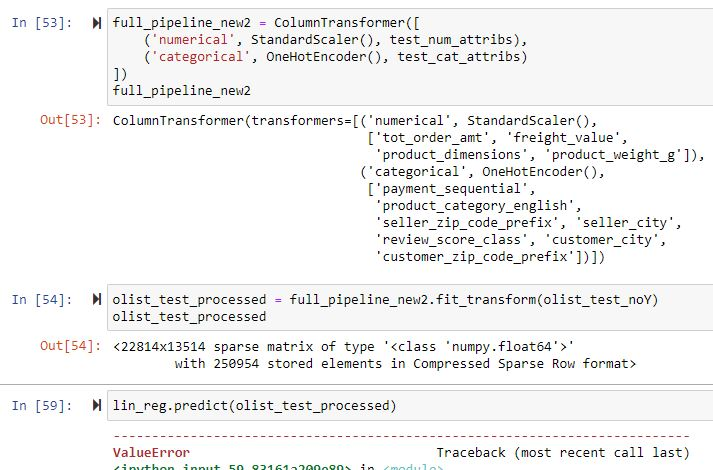 width="50" height="10>

##### Error message                                                                   
                                                                       
<img scrc=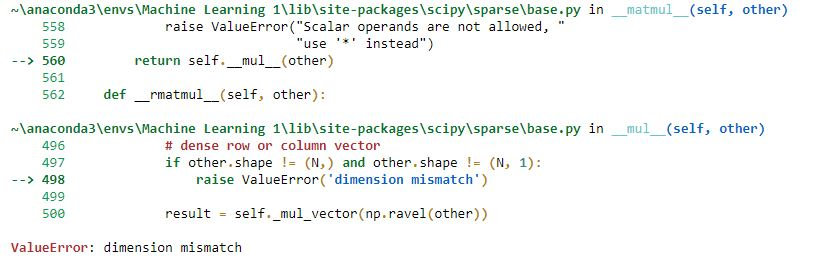 width="50" height="10>


###  Solution: Advanced linear model
#### Approach:

### MY OWN WORDS OF INTERPRETATION
I believe the column mismatch error could be due to the encoding that generated different number of columns for train and test sets.
I used the approach of Kyle Gilde (https://www.kaggle.com/kylegilde/building-columntransformers-dynamically) and it solved this problem.

- This approach separated high cardinal attributes (attributes with more than 10 levels) from low cardinal one (attributes with fewer than 10 levels) .
    - High cardinal attributes are those with significant number of levels (for instance, Product_category in the dataset with 73 levels.)
    - The popular OneHotEncoding() (OHE) was used to transform the low cardinal attributes
    - The Generalized Linear Mixed Model Encoder (GLMME) was used to transform the high cardinal attributes.
        - The GLMME also encodes each level of the categorical varible much like OHE but rather than return a 0,1 dummy varibles, its sci-kit learn documentation (http://contrib.scikit-learn.org/category_encoders/_modules/category_encoders/glmm.html) states  that there are no hyper-parameter to tune which makes it simple to use for me. It also states that it is supported by a well grounded statistical theory. This is because GLMME is an extension of such generalized linear models like the logistic regression (source: Institute for Digital Research and Education, UCLA. https://stats.idre.ucla.edu/other/mult-pkg/introduction-to-generalized-linear-mixed-models/)   



In [162]:
#Here is more compact way of selecting features with logical conditions
#instead of listing every single column in a rather large dataset
select_numeric_features = make_column_selector(dtype_include=np.number) #selects columns based on datatype.
numeric_features = select_numeric_features(olist_train_noY)


#Let us display the selected numeric features 
print(len(numeric_features)) , print(numeric_features)

7
['payment_sequential', 'payment_installments', 'tot_order_amt', 'freight_value', 'product_dimensions', 'product_weight_g', 'order_approved_hour']


(None, None)

The custom functions below were obtained from Kyle Gilde (https://www.kaggle.com/kylegilde/building-columntransformers-dynamically)

In [146]:
#Creates a utility custom function that selects low cardinality feature 
MAX_LEVELS = 10

def select_oh_features(df):
    
    OH_ =df.select_dtypes(['object', 'category']).apply(lambda col: col.nunique()).loc[lambda x: x <= MAX_LEVELS].index.tolist()
        
    return OH_

oh_features = select_oh_features(olist_train_noY)

print(len(oh_features)), print(oh_features)

2
['purchase_wk_day', 'review_score_class_num']


(None, None)

In [147]:
oh_pipeline1 = make_pipeline(OneHotEncoder(handle_unknown='ignore'))

In [148]:
#Creates a utility custom function that selects high cardinality feature 
def select_hc_features(df):
    
    hc_ =df.select_dtypes(['object', 'category']).apply(lambda col: col.nunique()).loc[lambda x: x > MAX_LEVELS].index.tolist()
        
    return hc_


hc_features = select_hc_features(olist_train_noY)


print(len(hc_features)), print(hc_features)

6
['product_category_english', 'seller_zip_code_prefix', 'seller_city', 'purchase_month', 'customer_city', 'customer_zip_code_prefix']


(None, None)

In [149]:
#Import the Categorical encoder library
#Make the GLMMEncoder() object for transforming the selected high cardinality features

import category_encoders as ce
hc_pipeline = make_pipeline(ce.GLMMEncoder())

In [73]:
#Standard default scaler for numeric variables.
numeric_pipeline = make_pipeline(StandardScaler()) 

In [150]:
fullpipeline = ColumnTransformer(transformers=\
                                       [('numeric_pipeline', numeric_pipeline, select_numeric_features),\
                                        ('oh_pipeline', oh_pipeline1, select_oh_features),\
                                        ('hc_pipeline', hc_pipeline, select_hc_features)],                                       
                                       remainder='drop')

In [75]:
#column_transformer1 = ColumnTransformer(transformers=\
#                                       [('numeric_pipeline', numeric_pipeline, select_numeric_features),\
#                                        ('oh_pipeline', oh_pipeline1, select_oh_features),\
 #                                       ('0c_pipeline', oh_pipeline1, select_hc_features)],                                       
 #                                      remainder='drop')

In [151]:
#Make Y classification
X_train_class = fullpipeline.fit_transform(olist_train_noY, olist_train_y)
X_test_class = fullpipeline.transform(olist_test_noY)

C:\Users\olani\anaconda3\envs\Machine Learning 1\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [153]:
#sanity check
X_train_class

array([[-0.13465314, -0.69620776, -0.5470666 , ...,  3.47774067,
         1.44810764, -3.95324178],
       [-0.13465314,  2.61117246, -0.18175807, ...,  2.5977437 ,
         2.53982178, -0.571972  ],
       [-0.13465314, -0.69620776, -0.17662821, ..., -2.80512457,
        -4.31797435, -3.54617818],
       ...,
       [-0.13465314,  0.03876562, -0.5412113 , ..., -2.80512457,
         7.53251653, -1.06756691],
       [-0.13465314,  0.03876562, -0.40037321, ..., -3.68147885,
         1.44810764,  1.83897703],
       [ 1.3710403 , -0.69620776, -0.44141212, ...,  1.13381411,
        -5.30385662, -5.57271187]])

In [154]:
print(X_train_class.shape)
print(X_test_class.shape)

(82445, 23)
(20612, 23)


### NaN in transformed data

The ColumnTransformation resulted in 2 NaN values that need to be fixed.
_I used imputation to fix it.

In [155]:

#Where the Nans occurred
np.argwhere(np.isnan(X_train_class))

array([[14788,     4],
       [14788,     5]], dtype=int64)

In [156]:
#Finding the NaN values
X_train_diff = pd.DataFrame(X_train_class)

In [157]:
#Checking out the NaNs
X_train_diff.iloc[14780:14792,3:6]

,3,4,5
14780,-0.316702,-0.508244,-0.495441
14781,-0.120943,-0.476803,-0.522086
14782,-0.319880,-0.478768,-0.428828
14783,-0.150816,-0.568051,-0.522086
14784,-0.809913,-0.433059,-0.508764
14785,1.050432,-0.418022,0.142982
14786,-0.156536,1.270569,-0.082438
14787,-0.789574,-0.600517,-0.495441
14788,0.436461,NaN,NaN
14789,-0.423480,0.501630,0.090757


In [158]:
olist_model5.iloc[14780:14792,3:6]

,seller_zip_code_prefix,seller_city,tot_order_amt
16288,35501.0,divinopolis,156.19
16289,81350.0,curitiba,135.94
16290,31710.0,belo horizonte,46.90
16291,81880.0,curitiba,41.99
16292,5729.0,sao paulo,51.10
16293,4102.0,sao paulo,21.77
16294,1511.0,sao paulo,54.62
16295,88820.0,icara,139.98
16297,9015.0,santo andre,34.09
16298,12327.0,jacarei,40.10


In [159]:
#Simple Imputer for the NaNs in ColumnTransform dataset
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer=imputer.fit(X_train_class)
X_train_class1=imputer.transform(X_train_class)

#### Modeling

In [160]:
## Too slow
from sklearn.svm import SVR
#model_svr = SVR(kernel='rbf',gamma='scale',C=100)

In [161]:
#model_svr.fit(X_train_class1, olist_train_y)

In [90]:
#Base Linear regression classifier
import statsmodels.api as sm
model = sm.OLS(olist_train_y, X_train_class1, missing='drop')
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     order_deliver_actual_duration   R-squared:                       0.459
Model:                                       OLS   Adj. R-squared:                  0.459
Method:                            Least Squares   F-statistic:                     3327.
Date:                           Fri, 18 Jun 2021   Prob (F-statistic):               0.00
Time:                                   14:38:54   Log-Likelihood:            -2.7730e+05
No. Observations:                          82445   AIC:                         5.546e+05
Df Residuals:                              82423   BIC:                         5.548e+05
Df Model:                                     21                                         
Covariance Type:                       nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0753      0.025      3.071      0.002       0.027       0.123
x2            -0.0333      0.026     -1.267      0.205      -0.085       0.018
x3            -0.0521      0.029     -1.806      0.071      -0.109       0.004
x4             0.6748      0.035     19.047      0.000       0.605       0.744
x5            -0.0916      0.042     -2.192      0.028      -0.174      -0.010
x6            -0.1348      0.043     -3.115      0.002      -0.220      -0.050
x7             0.0386      0.025      1.552      0.121      -0.010       0.087
x8             4.5385      0.061     74.674      0.000       4.419       4.658
x9             3.6989      0.058     64.306      0.000       3.586       3.812
x10            4.2868      0.069     62.501      0.000       4.152       4.421
x11            3.5392      0.066     53.583      0.000       3.410       3.669
x12            4.3312      0.060     72.440      0.000       4.214       4.448
x13            3.8775      0.058     67.195      0.000       3.764       3.991
x14            4.0496      0.059     68.899      0.000       3.934       4.165
x15           12.5803      0.061    207.762      0.000      12.462      12.699
x16            8.6731      0.077    113.126      0.000       8.523       8.823
x17            7.0682      0.029    240.280      0.000       7.010       7.126
x18           -0.0543      0.025     -2.208      0.027      -0.103      -0.006
x19            0.7604      0.015     49.784      0.000       0.730       0.790
x20           -0.0181      0.020     -0.913      0.361      -0.057       0.021
x21            0.6695      0.010     64.399      0.000       0.649       0.690
x22            0.0024      0.010      0.244      0.807      -0.017       0.022
x23            1.2446      0.008    150.291      0.000       1.228       1.261
==============================================================================
Omnibus:                    74019.826   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10933555.503
Skew:                           3.788   Prob(JB):                         0.00
Kurtosis:                      58.905   Cond. No.                     1.42e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.61e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [91]:
ypred = results.predict(X_test_class)

In [92]:
from statsmodels.tools.eval_measures import rmse
rmse = rmse(olist_test_y,ypred)
rmse

8.155339161401464

In [93]:
olist_train_y.describe()

count    82445.000000
mean        11.605895
std          9.501674
min         -6.000000
25%          6.000000
50%          9.000000
75%         15.000000
max        208.000000
Name: order_deliver_actual_duration, dtype: float64

In [111]:
#test preprocessed on linear regression and see what happens

lin_reg = LinearRegression()
model = lin_reg.fit(X_train_class1, olist_train_y)
#Predict SVc
y_test_pred_lr = model.predict(X_test_class)

In [97]:
from sklearn.metrics import mean_squared_error
#lin_mse = mean_squared_error(housing_labels, housing_predictions)

In [98]:
scores = cross_val_score(lin_reg, X_train_class1, olist_train_y,
                         scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)

In [99]:
scores

array([-6.7245899 , -6.97424492, -7.03185968, -7.54642071, -6.65627702])

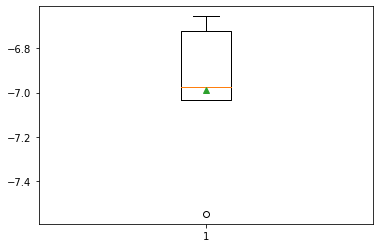

In [100]:
pyplot.boxplot(scores, showmeans=True)
pyplot.show()

In [112]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=100)
#sgd_reg.fit(X, y.ravel())

In [113]:
from sklearn.ensemble import RandomForestRegressor
rnd_reg = RandomForestRegressor(n_estimators=150, max_leaf_nodes=16, n_jobs=-1, random_state=100)

In [114]:
import xgboost
xgb_reg = xgboost.XGBRegressor(random_state=100)

In [115]:
myclf = [lin_reg,sgd_reg, rnd_reg, xgb_reg]

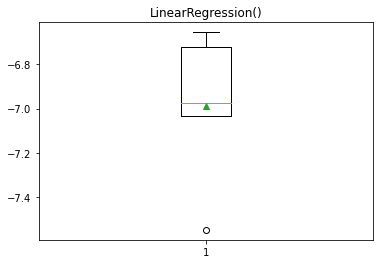

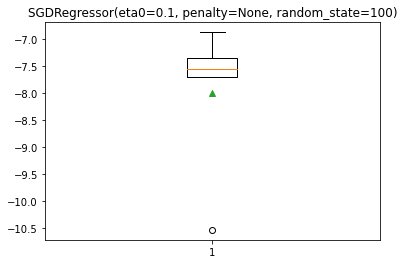

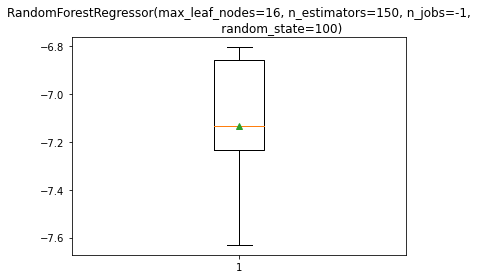

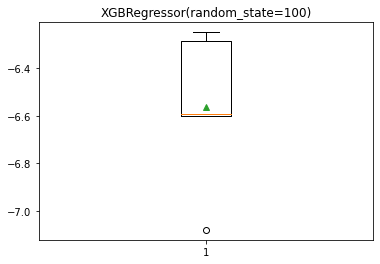

In [117]:
list_scores = []
for clf in myclf:
    scores = cross_val_score(clf, X_train_class1, olist_train_y,scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
    list_scores.append(scores)    
    pyplot.boxplot(scores, showmeans=True)
    pyplot.title(clf)
    pyplot.show()    

In [118]:
from sklearn.ensemble import RandomForestRegressor
rnd_reg = RandomForestRegressor(n_estimators=150, max_leaf_nodes=16, n_jobs=-1, random_state=100)
model_rf = rnd_reg.fit(X_train_class1, olist_train_y)
y_test_pred_rf = model_rf.predict(X_test_class)

In [119]:
final_rmse = np.sqrt(mean_squared_error(olist_test_y, y_test_pred_rf))
final_rmse

8.38107350169458

In [125]:
from sklearn.compose import ColumnTransformer
column_transformer.get_feature_names()

AttributeError: Transformer numeric_pipeline (type Pipeline) does not provide get_feature_names.

In [126]:
from feature_importance import FeatureImportance

ModuleNotFoundError: No module named 'feature_importance'

In [120]:
cat_encoder = column_transformer.named_transformers_["oh_pipeline"]
cat_encoder_glmm = column_transformer.named_transformers_["hc_pipeline"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
cat_glmm_attrib = list(cat_encoder_glmm.categories_[0])
attributes = numeric_features + cat_one_hot_attribs + cat_glmm_attrib
sorted(zip(feature_importances, attributes), reverse=True)

AttributeError: 'Pipeline' object has no attribute 'categories_'

# Deployment (5 points total)
* How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)? How would you measure the model's value if it was used by these parties? How would you deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.?

# Exceptional Work (10 points total)
* You have free reign to provide additional analyses.
* One idea: grid search parameters in a parallelized fashion and visualize the performances across attributes. Which parameters are most significant for making a good model for each classification algorithm?
* Boleto Bancário, commonly known as Boleto, is a popular Brazilian cash-based payment method with 15% market share. It is also the only payment method available for the 35% of shoppers who do not have a bank account.